In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
network = nn.Sequential(nn.Linear(13, 20), nn.ReLU(), nn.Linear(20, 15), nn.ReLU(), nn.Linear(15, 7))

In [3]:
database = torch.load("database.pt")

In [4]:
state = torch.tensor(database["state"], dtype = torch.float)
action = torch.tensor(database['action'].toarray(), dtype = torch.float)
reward = torch.tensor(database['reward'], dtype = torch.float)

In [5]:
state[0]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4098e-02, 2.4307e-04,
        0.0000e+00, 2.4307e-03, 1.2153e-03, 2.1706e-01, 4.3582e-01, 8.7335e-01,
        0.0000e+00])

In [6]:
action[0]

tensor([0., 0., 1., 0., 0., 0., 0.])

In [7]:
reward[0]

tensor(5.)

In [8]:
state.shape

torch.Size([380691, 13])

In [9]:
action.shape

torch.Size([380691, 7])

In [10]:
reward.shape

torch.Size([380692])

In [11]:
torch.isnan(reward).sum()

tensor(0)

In [12]:
reward

tensor([ 5.0000, -3.0000,  0.0000,  ...,  5.0000,  0.0000, -0.9000])

In [13]:
dummy_reward = reward.clone()

In [14]:
dummy_reward = dummy_reward[:-1]

In [15]:
dummy_reward.shape

torch.Size([380691])

In [16]:
import matplotlib.pyplot as plt

# Q(s, a) = R + g*max(q(s', a))

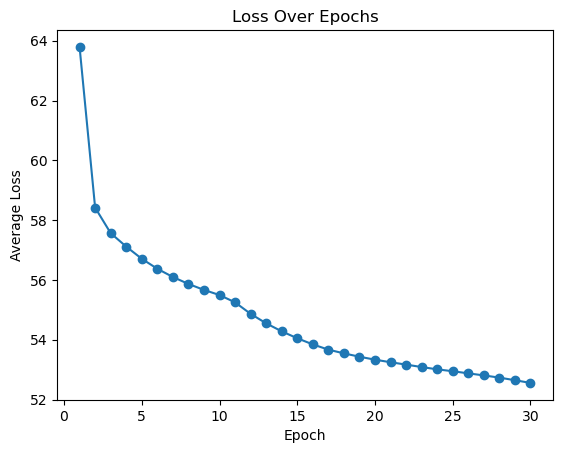

In [17]:
batch_size = 32
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters())
big_loss_list = []

epochs = 30

for epoch in range(epochs):
    loss_list = []

    for batch_index in range(0, len(state), batch_size):
        state_batch = state[batch_index:batch_index + batch_size]
        reward_batch = dummy_reward[batch_index:batch_index + batch_size]
        action_batch = action[batch_index:batch_index + batch_size]

        q_pred = network(state_batch)
        q_true = reward_batch.unsqueeze(1).repeat(1, 7)
        q_true *= action_batch
        q_pred *= action_batch

        loss = loss_function(q_true, q_pred)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_list.append(loss.item())

    epoch_loss = sum(loss_list) / len(loss_list)
    big_loss_list.append(epoch_loss)


plt.plot(range(1, epochs + 1), big_loss_list, marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

In [17]:
len(big_loss_list)

30

In [18]:
print(q_true * action_batch)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.9600e+01,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  2.1000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  2.1000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.6600e+01,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.1000e+00],
        [ 0.0000e+00,  0.0000e+00,  7.1000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  9.6000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  2.2100e+01],
        [ 

In [19]:
380691/32

11896.59375

In [25]:
torch.save(network.state_dict(), "networkOriginal.pt")